In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
dmap = np.load("../data/sealion/TrainDensity/872_2.npz")["dmap"]

In [23]:
thresholds = {"adult_males": 8.9704939e-05,
              'subadult_males': 0.00011353281,
              'juveniles': 0.00045413131,
              'adult_females': 0.00017314499,
              'pups': 0.001162576}

In [24]:
sealion_types = ["adult_males", 
    "subadult_males",
    "adult_females",
    "juveniles",
    "pups"]

In [136]:
def convert_dmap(dmap):
    # Rescale between layer, due to different gaussian
    rescale = np.array([1/8.9704939e-05, 1/0.00011353281, 1/0.00017314499, 1/0.00045413131, 1/0.001162576])
    dscaled = dmap * rescale
    
    # Keep only one non-zero value per pixel
    dmax = np.argmax(dscaled, axis=-1)
    dscaled[dmax!=0, 0] = 0
    dscaled[dmax!=1, 1] = 0
    dscaled[dmax!=2, 2] = 0
    dscaled[dmax!=3, 3] = 0
    dscaled[dmax!=4, 4] = 0
    
    # Thresholds differs due to the different size of the gaussians
    dmap_thresholded = (dscaled > 1)
    
    # Compute the background layer
    dsum = np.sum(dmap_thresholded, axis=-1)
    dbackground = dsum == 0
    
    # Merge the background layer
    dmerge = np.concatenate((dmap_thresholded, np.expand_dims(dbackground, axis=-1)), axis=-1)
    return dmerge.astype(np.int)

In [137]:
dm = convert_dmap(dmap)

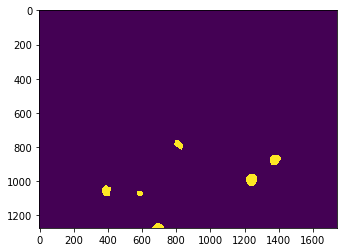

In [105]:
plt.imshow(dm[:,:,0])

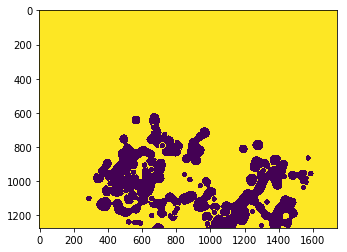

In [106]:
plt.imshow(dm[:,:,5])

In [144]:
cv2.imwrite("../data/g.png", (dm[:,:,5] * 255).astype(np.uint8))

True